# Explorative Data Analysis - Patients

In this notebook you find the explorative data analysis for the data of patients.
There is also diagnostic data of the patients, data of the used MRI machines and there is also laboratory data available.


## Imports and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set default plt figsize to (12,6)
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.colheader_justify', 'center')


In [2]:
# runs the clean and preprocessing notebook
%run "clean_preprocessing_dirty.ipynb"

In [3]:
# runs the data_partitioning notebook
%run "data_partitioning_dirty.ipynb"

Start Data Partitioning
Total Patients Train set: 328
Total Patients Test set: 37
Label Distribution relative Difference between Train- and Testset:
 ± 0.89 %
Total Dataframe Train rows: 574
Total Dataframe Test rows: 66
Label Distribution relative Difference between Train- and Testset:
 ± 1.42 %
Total Dataframe Fold 1 rows: 115
Total Dataframe Fold 2 rows: 115
Total Dataframe Fold 3 rows: 115
Total Dataframe Fold 4 rows: 115
Total Dataframe Fold 5 rows: 114
Label Distribution relative Difference between Fold 0 vs. Fold 1:
 ± 0.0 %
Label Distribution relative Difference between Fold 0 vs. Fold 2:
 ± 0.0 %
Label Distribution relative Difference between Fold 0 vs. Fold 3:
 ± 0.017 %
Label Distribution relative Difference between Fold 0 vs. Fold 4:
 ± 0.004 %
Label Distribution relative Difference between Fold 1 vs. Fold 2:
 ± 0.0 %
Label Distribution relative Difference between Fold 1 vs. Fold 3:
 ± 0.017 %
Label Distribution relative Difference between Fold 1 vs. Fold 4:
 ± 0.004 %
Labe

In [4]:
# runs the imputation notebook
%run "imputation_dirty.ipynb"

Start Imputation Lab data
Sparsity of lab values of trainset before imputation, in percent is:
COR     70.209059
FSH     73.344948
FT4     68.815331
IGF1    69.686411
LH      73.519164
PROL    65.679443
TEST    81.184669
dtype: float64
Sparsity of lab values of testset before imputation, in percent is:
COR     71.212121
FSH     77.272727
FT4     68.181818
IGF1    77.272727
LH      77.272727
PROL    66.666667
TEST    90.909091
dtype: float64
Sparsity of lab values in trainset after imputation, in percent is:
COR     0.0
FSH     0.0
FT4     0.0
IGF1    0.0
LH      0.0
PROL    0.0
TEST    0.0
dtype: float64
Sparsity of lab values in testset after imputation, in percent is:
COR     0.0
FSH     0.0
FT4     0.0
IGF1    0.0
LH      0.0
PROL    0.0
TEST    0.0
dtype: float64
End Imputation Lab data


In [5]:
# read train data set
df = pd.read_csv(r'../data/train_data_dirty.csv')

In [6]:
# set category data type in pandas, check datatypes
df['Category'] = df['Category'].astype('category')
df['Patient_gender'] = df['Patient_gender'].astype('category')

## Dataframe Summary

In [7]:
df.head()

,Patient_ID,Category,Case_ID,COR,FSH,FT4,IGF1,LH,PROL,TEST,Date_Case,MRI_Case_ID,Patient_age,Patient_gender,Pre_OP_hormone_thyreo,Pre_OP_hormone_gonado,Pre_OP_hormone_somato,Pre_OP_hormone_hyperprolaktin,fold
0,300101347,non-prolaktinom,41147095,368.7775,5.8,13.90000,19.500,6.2,16.7,1.08,NaN,NaN,40,female,0,0,0,0,0
1,300101347,non-prolaktinom,40473567,550.0000,5.8,15.70262,22.401,6.2,260.5,1.08,2018-06-25 09:50:00,7734249.0,40,female,0,0,0,0,0
2,300101347,non-prolaktinom,41147095,550.0000,5.8,15.70262,22.401,6.2,260.5,1.08,2021-03-08 14:50:00,7896469.0,40,female,0,0,0,0,2
3,300109121,non-prolaktinom,40689394,352.6750,2.0,11.50000,6.010,0.6,8.1,0.52,NaN,NaN,73,male,0,1,1,0,0
4,300109121,non-prolaktinom,40689394,550.0000,4.0,15.44520,16.113,2.5,250.3,7.89,2019-03-20 11:01:00,7893637.0,73,male,0,1,1,0,4


In [8]:
df.tail()

,Patient_ID,Category,Case_ID,COR,FSH,FT4,IGF1,LH,PROL,TEST,Date_Case,MRI_Case_ID,Patient_age,Patient_gender,Pre_OP_hormone_thyreo,Pre_OP_hormone_gonado,Pre_OP_hormone_somato,Pre_OP_hormone_hyperprolaktin,fold
569,300005160,non-prolaktinom,41124680,349.736,9.2,12.20000,22.000,6.5,16.5,1.19,NaN,NaN,45,female,0,0,0,0,2
570,300005160,non-prolaktinom,41684113,349.736,9.2,12.20000,22.000,6.5,16.5,1.19,NaN,NaN,45,female,0,0,0,0,1
571,300005160,non-prolaktinom,41124680,550.000,5.8,15.70262,19.388,6.2,252.5,1.08,2021-02-22 14:10:00,8347681.0,45,female,0,0,0,0,3
572,300005160,non-prolaktinom,41684113,550.000,5.8,15.70262,19.388,6.2,252.5,1.08,2023-01-09 14:36:00,8853857.0,45,female,0,0,0,0,4
573,80696,non-prolaktinom,41132330,550.000,5.5,15.44520,14.279,3.2,250.3,13.10,2021-04-01 09:12:00,8372415.0,79,male,0,0,0,0,4


In [9]:
print("Total Dataframe rows:", len(df))
print("Total Dataframe columns:", len(df.columns))
label_col = 'Category'
non_prol_n = len(df[df[label_col] == 'non-prolaktinom'])
prol_n = len(df[df[label_col] == 'prolaktinom'])
print("Dataframe rows with prolatinom label:", prol_n)
print("Dataframe rows with non-prolatinom label:", non_prol_n)

Total Dataframe rows: 574
Total Dataframe columns: 19
Dataframe rows with prolatinom label: 131
Dataframe rows with non-prolatinom label: 443


## Distribution Analysis
we will take a look at the distributions of the variables and check for outliers as well.

#### Prolactin (hormone)
The Column 'Prolactin' contains the measured values of prolactin for the patient.


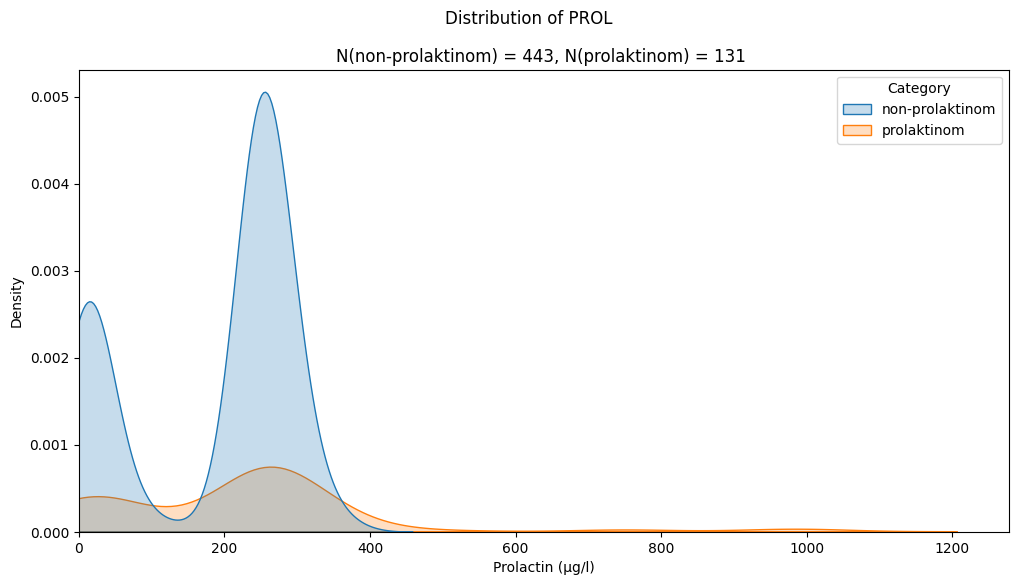

In [10]:
column = 'PROL'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Prolactin (μg/l)')
plt.xlim(0, None)
plt.show()

#### Cortisol
The Column 'COR' contains the measured values of Cortisol for the patient.


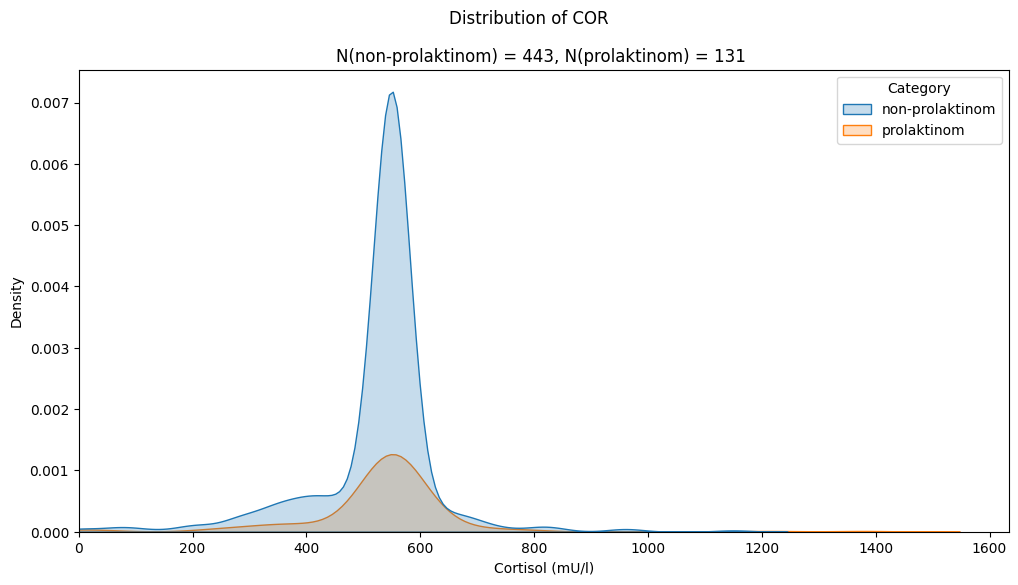

In [11]:
column = 'COR'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Cortisol (mU/l)')
plt.xlim(0, None)
plt.show()

#### IGF1 (hormone)
The Column 'IGF1' contains the measured values of Insulin-like growth factor 1 for the patient.


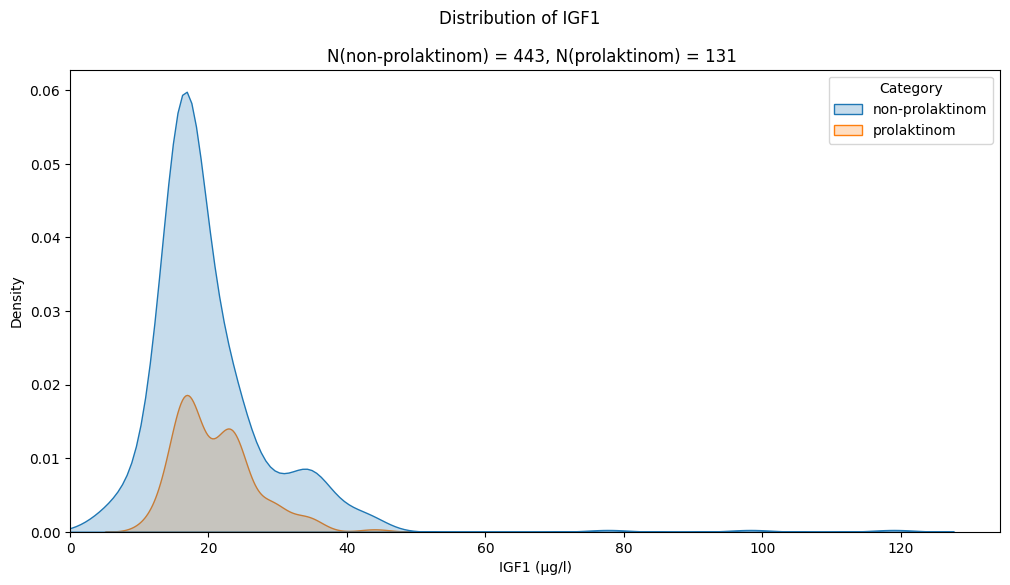

In [12]:
column = 'IGF1'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('IGF1 (μg/l)')
plt.xlim(0, None)
plt.show()

#### FT4 (hormone)
The Column 'FT4' contains the measured values of Thyroxine free hormone for the patient.


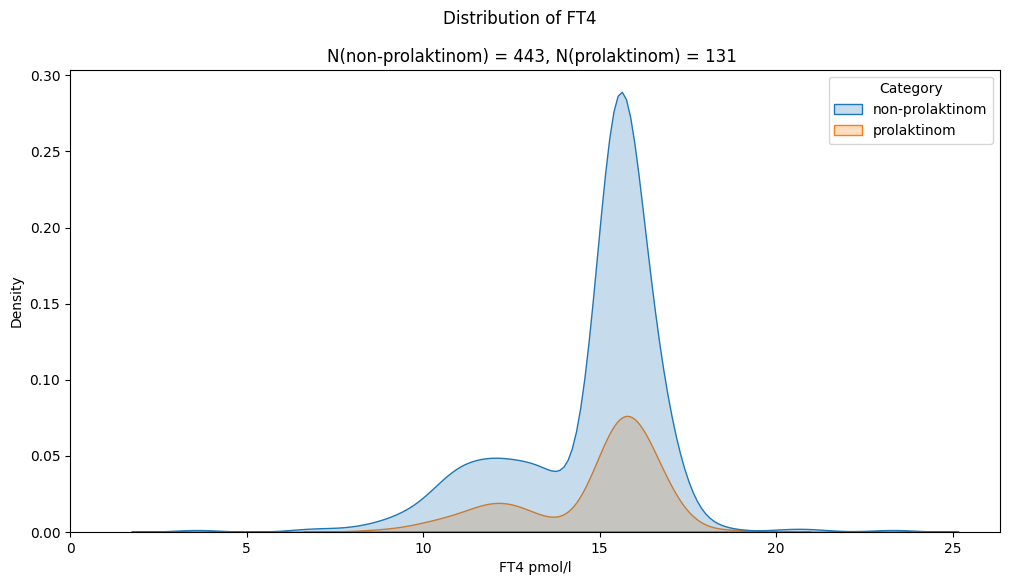

In [13]:
column = 'FT4'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FT4 pmol/l')
plt.xlim(0, None)
plt.show()


#### Testosteron (hormone)
The Column 'Testosteron' contains the measured values of Testosteron for the patient.


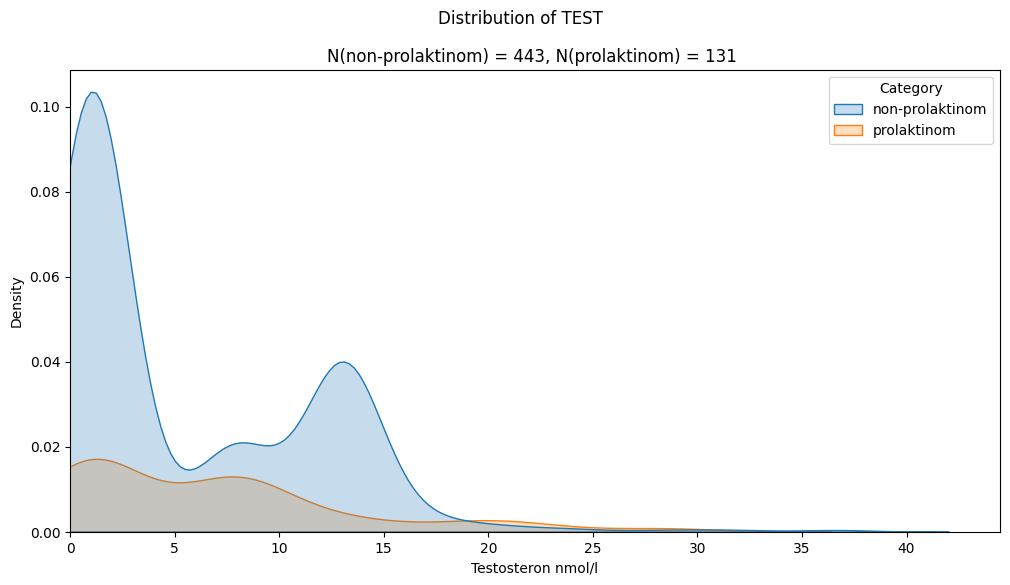

In [14]:
column = 'TEST'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('Testosteron nmol/l')
plt.xlim(0, None)
plt.show()

#### LH (hormone)
The Column 'LH' contains the measured values of Luteinizing Hormone for the patient.


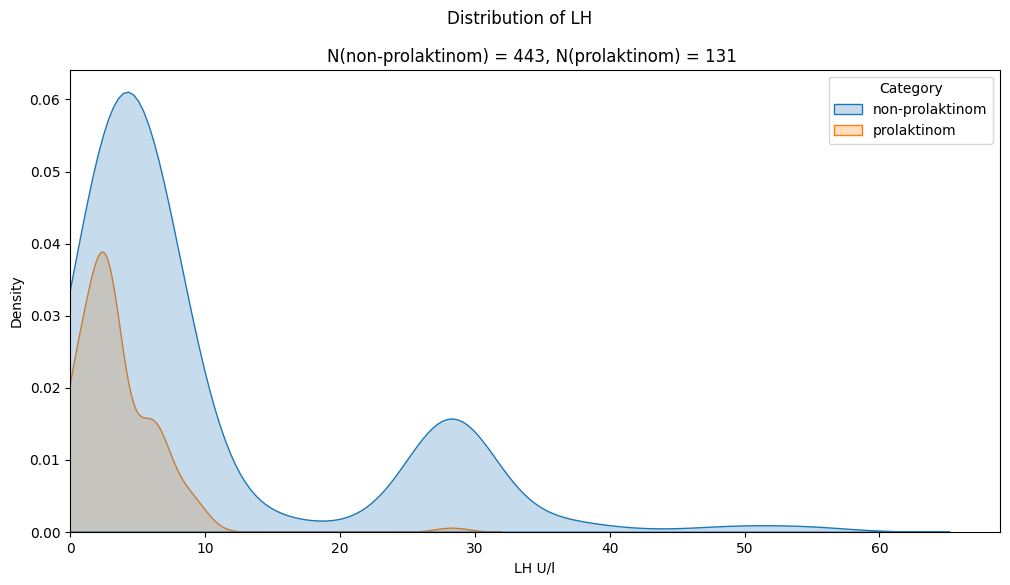

In [15]:
column = 'LH'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('LH U/l')
plt.xlim(0, None)
plt.show()

#### FSH (hormone)
The Column 'FSH' contains the measured values of Follicle-stimulating hormone  for the patient.


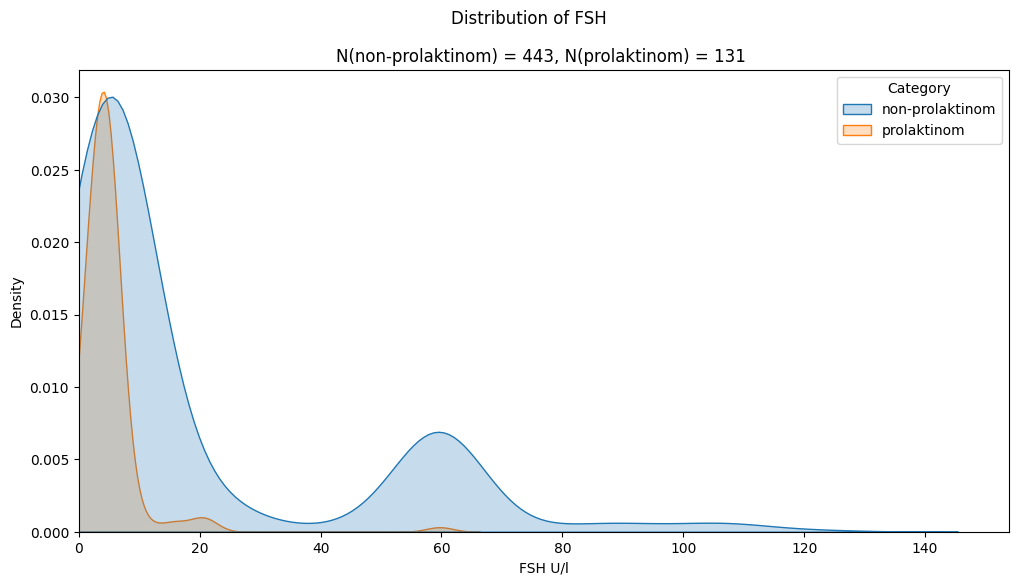

In [16]:
column = 'FSH'
sns.kdeplot(df,x=column,hue=label_col,fill=True,)
plt.title(f"N(non-prolaktinom) = {non_prol_n}, N(prolaktinom) = {prol_n} ")
plt.suptitle(f'Distribution of {column}')
plt.xlabel('FSH U/l')
plt.xlim(0, None)
plt.show()